# **Dry Bean Data Analysis And ML Modeling**

## Import Dependencies

In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [439]:
bean_df = pd.read_excel("Dry_Bean_Dataset.xlsx")
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
bean_df.shape

(13611, 17)

# EDA

The data set is about classification of dry beans. There are 16 feature and one target named "Class". Some feature like Area are directly comes from shape of beans and some of them like ShapeFactor1 are combination of other features. For example: 
* Area(A) comes from "The area of a bean zone and the number of pixels within its boundaries". 
* Also ShapeFactor1 comes from ShapeFactor1(SF1) = L/A. Other formulas are [here](https://doi.org/10.1016/j.compag.2020.105507).
* The "Class" feature are included seven types: 'SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'

Overally the features are:
* Area (A): The area of a bean zone and the number of pixels within its boundaries.
* Perimeter (P): Bean circumference is defined as the length of its border.
* Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
* Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
* Aspect ratio (K): Defines the relationship between L and l.
* Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
* Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
* Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
* Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
* Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
* Roundness (R): Calculated with the following formula: (4piA)/(P^2)
* Compactness (CO): Measures the roundness of an object: Ed/L
* ShapeFactor1 (SF1)
* ShapeFactor2 (SF2)
* ShapeFactor3 (SF3)
* ShapeFactor4 (SF4)
* Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [5]:
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

As it's clear there are 13611 instances and there isn't any nan values, so there is no need to imputer or filling null data.

In [6]:
bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


There are seven different classes, the names and images are coming next.

In [7]:
bean_df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

<img src="images/beans_pics.jpg">

To understand the distribution of data, the table and the bar plot were shown next. As it's clear "DERMASON" is the most instance and the "BOMBAY" is the least.

In [8]:
bean_df_count = bean_df.groupby("Class").agg(
    class_count=("Class", "count")).reset_index().sort_values(
    "class_count", ascending=False)
bean_df_count

,Class,class_count
3,DERMASON,3546
6,SIRA,2636
5,SEKER,2027
4,HOROZ,1928
2,CALI,1630
0,BARBUNYA,1322
1,BOMBAY,522


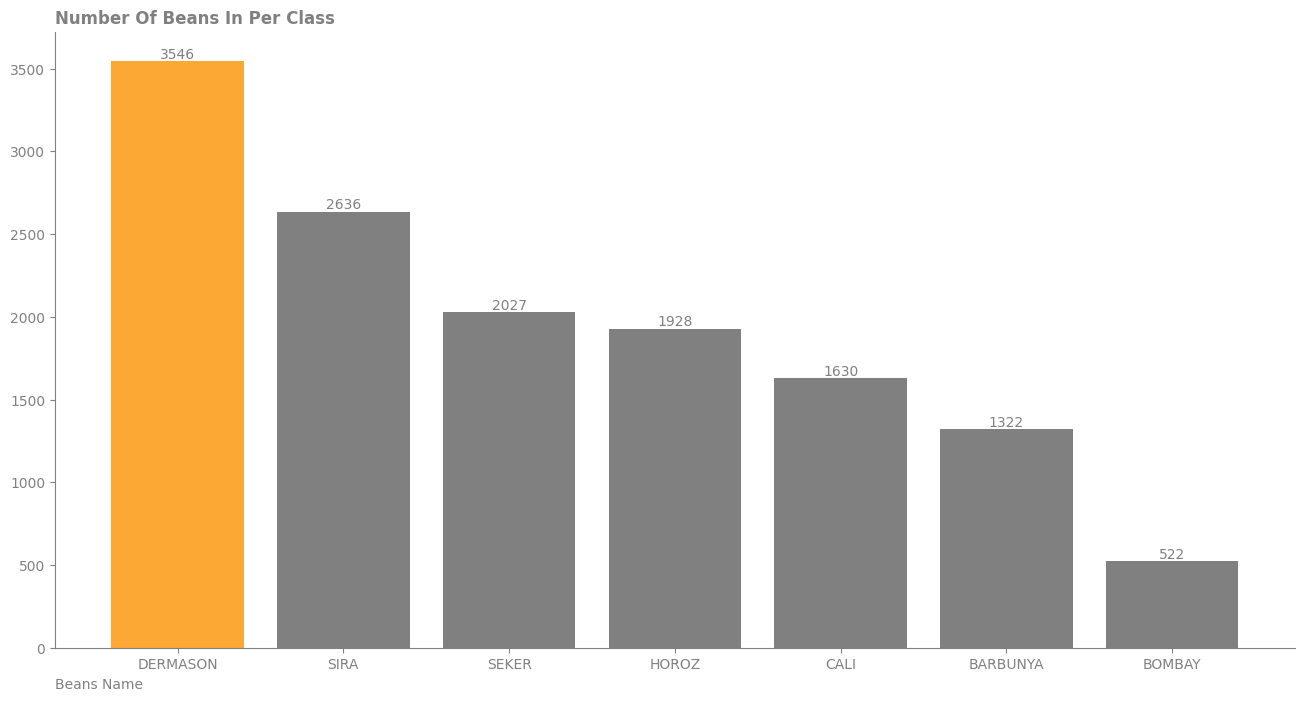

In [429]:
fig, ax = plt.subplots(figsize=(16, 8))
clrs = ["gray" if (x < max(bean_df_count["class_count"])) else "#FBA834"
         for x in bean_df_count["class_count"]]

ax.bar(bean_df_count["Class"], 
        bean_df_count["class_count"], color=clrs)

ax.set_title("Number Of Beans In Per Class", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Beans Name", loc="left", color="gray")

for bars in ax.containers:
    ax.bar_label(bars, color="gray")
    
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.show()

In [384]:
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


The importance of features were shown in next scatter plots. First plot is based on convexArea and roundness features. as it's obvious instances are not splitted very good, the situation for Area and ConvexArea is much worse. But in the next scatter plot some complex feature were used, and it is based on ShapeFactor1 and ShapeFactor3 features. It's clear that the classes are much more clear than before. 

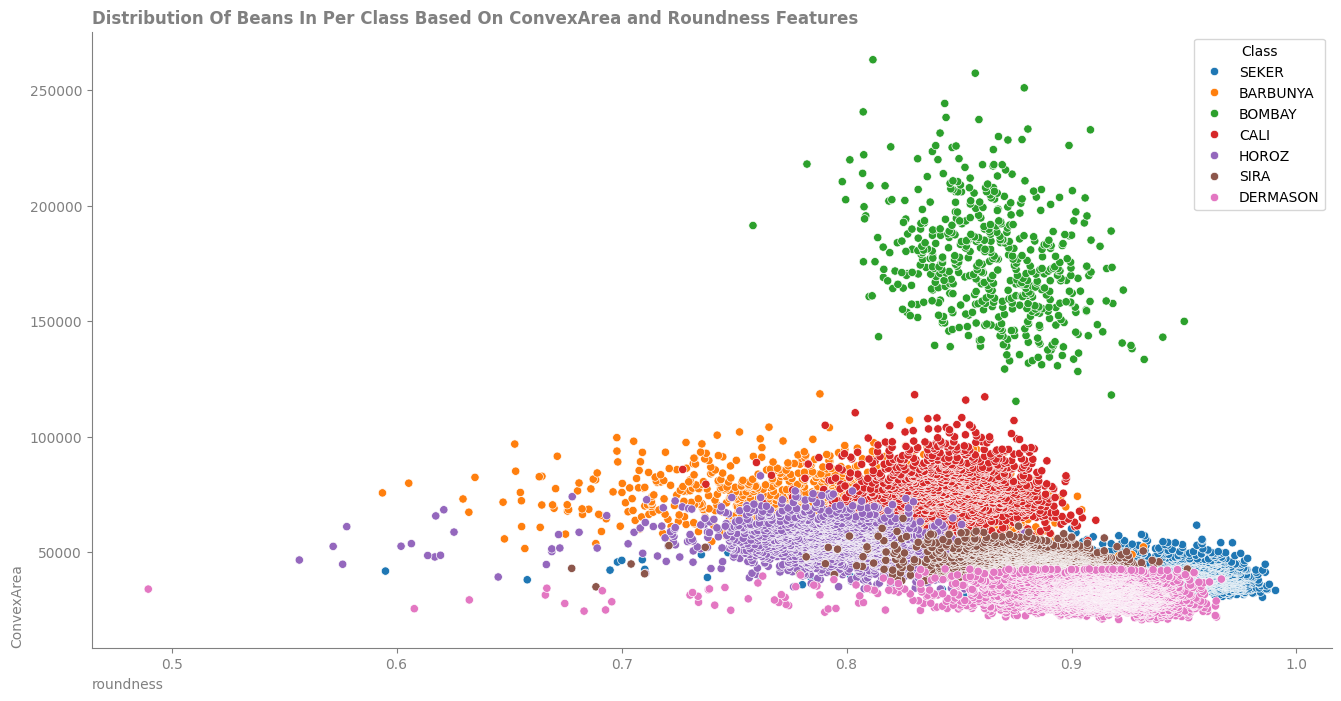

In [433]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(x=bean_df["roundness"] , y=bean_df['ConvexArea'], hue=bean_df.Class )

ax.set_title("Distribution Of Beans In Per Class Based On ConvexArea and Roundness Features", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("roundness", loc="left", color="gray")
ax.set_ylabel("ConvexArea", loc="bottom", color="gray")


ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.show()

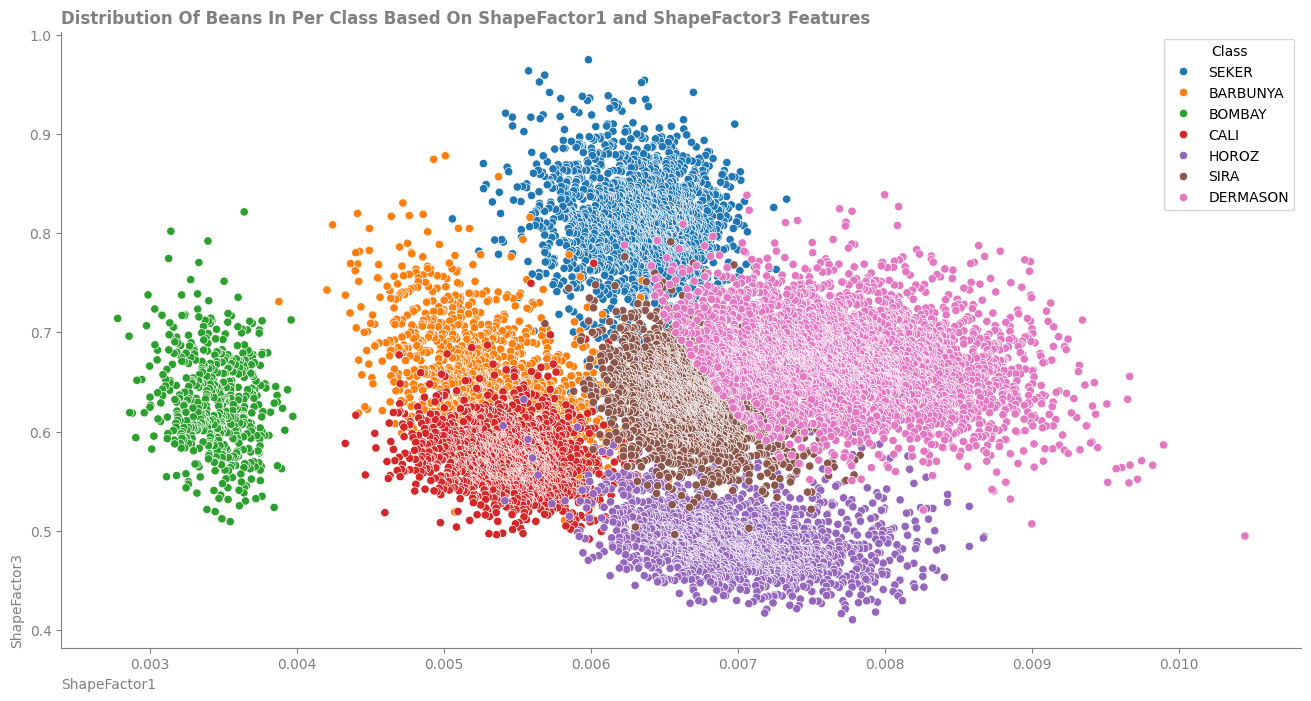

In [431]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(x=bean_df["ShapeFactor1"] , y=bean_df['ShapeFactor3'], hue=bean_df.Class )

ax.set_title("Distribution Of Beans In Per Class Based On ShapeFactor1 and ShapeFactor3 Features", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("ShapeFactor1", loc="left", color="gray")
ax.set_ylabel("ShapeFactor3", loc="bottom", color="gray")


ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.show()

## Modeling

For modeling data, **five** different models were used:
* **Logistic Regression**
* **KNN**
* **SVC**
* **Random Forest**
* **XGBoost**

Finally they will be compared each other.

In [440]:
X = bean_df.drop("Class", axis=1).values
y = bean_df["Class"]

In [441]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression

In [442]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [443]:
from sklearn.linear_model import LogisticRegression
bean_log_model = LogisticRegression()

At first step Logistic Regression without any changes was used, so accuracy is about 69%. But After some changes and tuning some parameters the accuracy was achieved up to more than 90%. 

In [444]:
bean_log_model.fit(X_train, y_train)

c:\Users\amine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [445]:
predictions = bean_log_model.predict(X_valid)

In [447]:
confusion_matrix(y_valid, predictions)

array([[139,   0,  79,   0,  41,   1,   5],
       [  0, 103,   1,   0,   0,   0,   0],
       [ 58,   0, 253,   0,  11,   3,   1],
       [  0,   0,   0, 618,   3,  28,  60],
       [  8,   0,  12,  21, 214,   3, 128],
       [  3,   0,   0,  82,   8, 252,  61],
       [  1,   0,   0,  38,  77,  87, 324]], dtype=int64)

In [446]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, predictions)

0.6988615497612927

The first step is to scaling data, for this goal, MinMaxScaler was used.Then as a feature selector SelectKBest with CHI2 were used.

In [453]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

feature_selector = Pipeline(steps=[("feat_selector", SelectKBest(chi2))])

A pipeline for doing all duties was used.

In [454]:
bean_log_reg_clf = LogisticRegression(random_state=0)
bean_log_reg_clf_pipeline = Pipeline(
    steps=[
        ("selector", feature_selector),
        ("model", bean_log_reg_clf),
    ]
)

In [455]:
from sklearn import set_config

set_config(display="diagram")
display(bean_log_reg_clf_pipeline)

Pipeline(steps=[('selector',
                 Pipeline(steps=[('feat_selector',
                                  SelectKBest(score_func=<function chi2 at 0x00000260C5E504A0>))])),
                ('model', LogisticRegression(random_state=0))])

After scaling data, again train_test_split was used.

In [456]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [457]:
bean_log_reg_clf_pipeline.fit(X_train, y_train)

score = bean_log_reg_clf_pipeline.score(X_valid, y_valid)
print(f"Model score: {score}") 

Model score: 0.8912963643040764


c:\Users\amine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As it was clear in previous part the acc was achieved to 89%. The nex step is tuning parameter an using cross validation to find best parameters and best acc score. At first parameters like "penalty" and etc were declared and were passed to GridSearchCV. Accuracy was achieved up to 91% after that. 

In [458]:
param_grid_logistic_regression = {
    "model__penalty": ["l1", "l2"],
    "model__C": np.logspace(-4, 4, 20),
    "model__solver": ["liblinear"]
}

In [459]:
from sklearn.model_selection import GridSearchCV

grid_search_logistic_regression = GridSearchCV(
    bean_log_reg_clf_pipeline,
    param_grid=param_grid_logistic_regression,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1,
)

In [462]:
grid_search_logistic_regression.fit(X_train, y_train)

print("Best Score of train set: " + str(grid_search_logistic_regression.best_score_))
print("Best parameter set: " + str(grid_search_logistic_regression.best_params_))
print("Test Score: " + str(grid_search_logistic_regression.score(X_valid, y_valid)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Best Score of train set: 0.9161463889321242
Best parameter set: {'model__C': 10000.0, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Test Score: 0.9140653690782226


Again prediction based on best parameters was done and also confusion matrix was shown the next.   

In [463]:
y_pred_logistic = grid_search_logistic_regression.best_estimator_.predict(X_valid)

In [464]:
confusion_matrix_logistic = confusion_matrix(y_valid, y_pred_logistic)

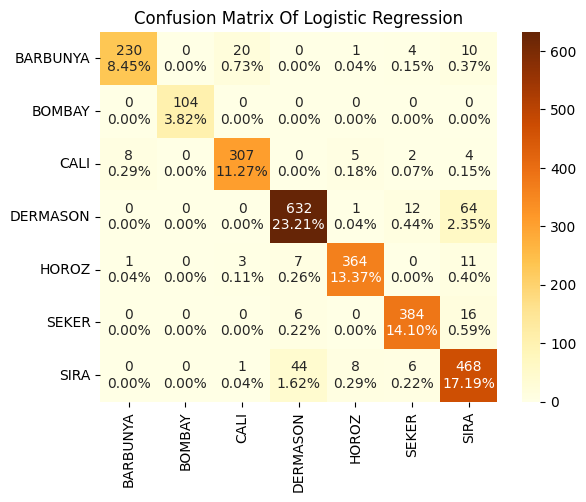

In [467]:
labels = ["BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SEKER","SIRA"]
group_names = ["BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SEKER","SIRA"]
group_counts = [
    "{0:0.0f}".format(value) for value in confusion_matrix_logistic.flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in confusion_matrix_logistic.flatten() / np.sum(confusion_matrix_logistic)
]
labels_matrix = [
    f"{v1}\n{v2}"
    for v1, v2 in zip(group_counts, group_percentages)
]
labels_matrix = np.asarray(labels_matrix).reshape(7, 7)
sns.heatmap(confusion_matrix_logistic, annot=labels_matrix, fmt="", cmap="YlOrBr",
            xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix Of Logistic Regression")
plt.show()

With classification_report it's possible to know some metrics like "precision", "recall", "f1-score" and "accuracy".

In [466]:
print(classification_report(y_valid,y_pred_logistic))

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.87      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.93       326
    DERMASON       0.92      0.89      0.90       709
       HOROZ       0.96      0.94      0.95       386
       SEKER       0.94      0.95      0.94       406
        SIRA       0.82      0.89      0.85       527

    accuracy                           0.91      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.91      0.91      2723



### Knn

In [357]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=7)

In [358]:
knn_clf.fit(X_train, y_train)
score = knn_clf.score(X_valid, y_valid)
print(f"Model score: {score}")  # model accuracy

Model score: 0.7245684906353287


In [359]:
param_grid_knn = {
    "weights": ['uniform', 'distance'],
    "metric": ['minkowski','euclidean','manhattan'],
}

In [360]:
grid_search_knn = GridSearchCV(
    knn_clf,
    param_grid=param_grid_knn,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1,
)

In [361]:
grid_search_knn.fit(X_train, y_train)

print("Best Score of train set: " + str(grid_search_knn.best_score_))
print("Best parameter set: " + str(grid_search_knn.best_params_))
print("Test Score: " + str(grid_search_knn.score(X_valid, y_valid)))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\amine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.70664755 0.73089512 0.70664755 0.73089512        nan 0.79224681]
  warnings.warn(


Best Score of train set: 0.7922468093470724
Best parameter set: {'metric': 'manhattan', 'weights': 'distance'}
Test Score: 0.8002203452074917


In [362]:
y_pred_knn = grid_search_knn.best_estimator_.predict(X_valid)

In [363]:
confusion_matrix_knn = confusion_matrix(y_valid, y_pred_knn)

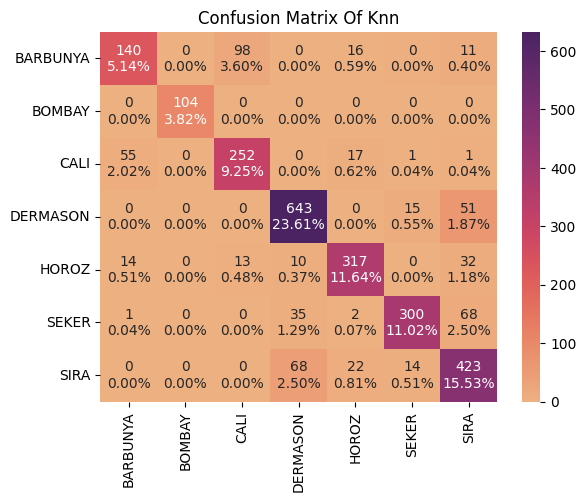

In [364]:
group_counts = [
    "{0:0.0f}".format(value) for value in confusion_matrix_knn.flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in confusion_matrix_knn.flatten() / np.sum(confusion_matrix_knn)
]
labels_matrix = [
    f"{v1}\n{v2}"
    for v1, v2 in zip(group_counts, group_percentages)
]
labels_matrix = np.asarray(labels_matrix).reshape(7, 7)
sns.heatmap(confusion_matrix_logistic, annot=labels_matrix, fmt="", cmap="flare",
            xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix Of Knn")
plt.show()

In [341]:
print(classification_report(y_valid,y_pred_knn))

              precision    recall  f1-score   support

    BARBUNYA       0.67      0.53      0.59       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.69      0.77      0.73       326
    DERMASON       0.85      0.91      0.88       709
       HOROZ       0.85      0.82      0.83       386
       SEKER       0.91      0.74      0.82       406
        SIRA       0.72      0.80      0.76       527

    accuracy                           0.80      2723
   macro avg       0.81      0.80      0.80      2723
weighted avg       0.80      0.80      0.80      2723



## SVM

In [159]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=0)
svc_clf_pipeline = Pipeline(
    steps=[
        ("selector", feature_selector),
        ("model", svc_clf),
    ]
)

In [160]:
set_config(display="diagram")
display(svc_clf_pipeline)

Pipeline(steps=[('selector',
                 Pipeline(steps=[('feat_selector',
                                  SelectKBest(score_func=<function chi2 at 0x00000260C5E504A0>))])),
                ('model', SVC(random_state=0))])

In [161]:
svc_clf_pipeline.fit(X_train, y_train)

score = svc_clf_pipeline.score(X_valid, y_valid)
print(f"Model score: {score}")  # model accuracy

Model score: 0.9037825927286082


In [162]:
param_grid_svc = {
    "model__C": [0.1, 1, 10, 100, 1000],
    "model__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "model__kernel": ["rbf", "poly"],
}

In [165]:
grid_search_svc = GridSearchCV(
    svc_clf_pipeline,
    param_grid=param_grid_svc,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1,
)

In [166]:
grid_search_svc.fit(X_train, y_train)

print("Best Score of train set: " + str(grid_search_svc.best_score_))
print("Best parameter set: " + str(grid_search_svc.best_params_))
print("Test Score: " + str(grid_search_svc.score(X_valid, y_valid)))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Score of train set: 0.9250554570636418
Best parameter set: {'model__C': 1000, 'model__gamma': 1, 'model__kernel': 'poly'}
Test Score: 0.9173705471905986


In [167]:
y_pred_svc = grid_search_svc.best_estimator_.predict(X_valid)

In [168]:
confusion_matrix_svc = confusion_matrix(y_valid, y_pred_svc)

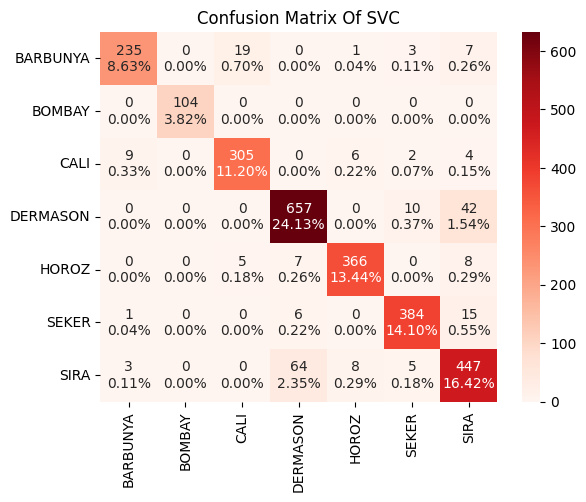

In [337]:
# labels = ["BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SEKER","SIRA"]
# group_names = ["BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SEKER","SIRA"]
group_counts = [
    "{0:0.0f}".format(value) for value in confusion_matrix_svc.flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in confusion_matrix_svc.flatten() / np.sum(confusion_matrix_svc)
]
labels_matrix = [
    f"{v1}\n{v2}"
    for v1, v2 in zip(group_counts, group_percentages)
]
labels_matrix = np.asarray(labels_matrix).reshape(7, 7)
sns.heatmap(confusion_matrix_logistic, annot=labels_matrix, fmt="", cmap="Reds",
            xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix Of SVC")
plt.show()

In [343]:
print(classification_report(y_valid,y_pred_svc))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.93       326
    DERMASON       0.90      0.93      0.91       709
       HOROZ       0.96      0.95      0.95       386
       SEKER       0.95      0.95      0.95       406
        SIRA       0.85      0.85      0.85       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



## Random Forest

In [415]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf_pipeline = RandomForestClassifier(random_state=42)
random_forest_clf_pipeline = Pipeline(
    steps=[
        ("selector", feature_selector),
        ("model", random_forest_clf_pipeline),
    ]
)

In [416]:
set_config(display="diagram")
display(svc_clf_pipeline)

Pipeline(steps=[('selector',
                 Pipeline(steps=[('feat_selector',
                                  SelectKBest(score_func=<function chi2 at 0x00000260C5E504A0>))])),
                ('model', RandomForestClassifier(random_state=0))])

In [417]:
random_forest_clf_pipeline.fit(X_train, y_train)

score = random_forest_clf_pipeline.score(X_valid, y_valid)
print(f"Model score: {score}")  # model accuracy

Model score: 0.9096584649283878


In [206]:
param_grid_random_forest = {
    "max_depth": np.arange(3, 9, 1),
    "n_estimators": np.arange(100, 200, 50),
    "criterion": ["gini", "entropy"]
}

In [207]:
grid_search_random_forest = GridSearchCV(
    random_forest_clf_pipeline,
    param_grid=param_grid_random_forest,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1,
)

In [208]:
grid_search_random_forest.fit(X_train, y_train)

print("Best Score of train set: " + str(grid_search_random_forest.best_score_))
print("Best parameter set: " + str(grid_search_random_forest.best_params_))
print("Test Score: " + str(grid_search_random_forest.score(X_valid, y_valid)))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score of train set: 0.9205551147673334
Best parameter set: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 150}
Test Score: 0.9155343371281675


In [209]:
y_pred_random_forest = grid_search_random_forest.best_estimator_.predict(X_valid)

In [210]:
confusion_matrix_random_forest = confusion_matrix(y_valid, y_pred_svc)

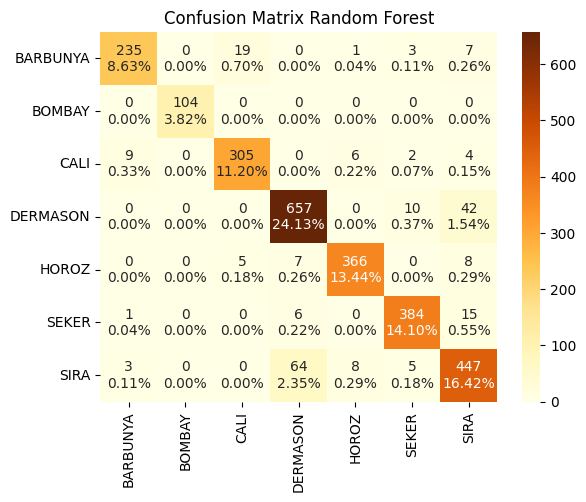

In [219]:
group_counts = [
    "{0:0.0f}".format(value) for value in confusion_matrix_random_forest.flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in confusion_matrix_random_forest.flatten() / np.sum(confusion_matrix_random_forest)
]
labels_matrix = [
    f"{v1}\n{v2}"
    for v1, v2 in zip(group_counts, group_percentages)
]
labels_matrix = np.asarray(labels_matrix).reshape(7, 7)
sns.heatmap(confusion_matrix_random_forest, annot=labels_matrix, fmt="", cmap="YlOrBr",
            xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix Random Forest")
plt.show()

In [344]:
print(classification_report(y_valid,y_pred_random_forest))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.87      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.94      0.93       326
    DERMASON       0.90      0.92      0.91       709
       HOROZ       0.97      0.94      0.95       386
       SEKER       0.93      0.95      0.94       406
        SIRA       0.85      0.85      0.85       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



## XGBoost

In [220]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier(random_state=0)
xgboost_clf_pipeline = Pipeline(
    steps=[
        ("model", xgboost_clf),
    ]
)

In [221]:
set_config(display="diagram")
display(xgboost_clf_pipeline)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [231]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [232]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [228]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [233]:
xgboost_clf_pipeline.fit(X_train, y_train)
# preds = log_reg_clf_pipeline.predict(X_test)
score = xgboost_clf_pipeline.score(X_valid, y_valid)
print(f"Model score: {score}")  # model accuracy

Model score: 0.9265515975027543


In [237]:
xgb_param_grid = {
    "model__learning_rate": np.arange(0.05, 1, 0.05),
    "model__max_depth": np.arange(3, 7, 1),
    "model__n_estimators": np.arange(50, 200, 50),
}

In [238]:
grid_search_xgb = GridSearchCV(
    xgboost_clf_pipeline,
    param_grid=xgb_param_grid,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1,
)

In [239]:
grid_search_xgb.fit(X_train, y_train)

print("Best Score of train set: " + str(grid_search_xgb.best_score_))
print("Best parameter set: " + str(grid_search_xgb.best_params_))
print("Test Score: " + str(grid_search_xgb.score(X_valid, y_valid)))

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
Best Score of train set: 0.9320353069256899
Best parameter set: {'model__learning_rate': 0.2, 'model__max_depth': 6, 'model__n_estimators': 100}
Test Score: 0.9243481454278369


In [240]:
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_valid)

In [245]:
confusion_matrix_xgb = confusion_matrix(y_valid, y_pred_xgb)
confusion_matrix_xgb

array([[237,   0,  17,   1,   0,   3,   7],
       [  0, 104,   0,   0,   0,   0,   0],
       [  9,   0, 306,   0,   6,   2,   3],
       [  0,   0,   0, 655,   0,  11,  43],
       [  1,   0,   3,   5, 370,   0,   7],
       [  3,   0,   0,   7,   0, 387,   9],
       [  2,   0,   0,  56,   7,   4, 458]], dtype=int64)

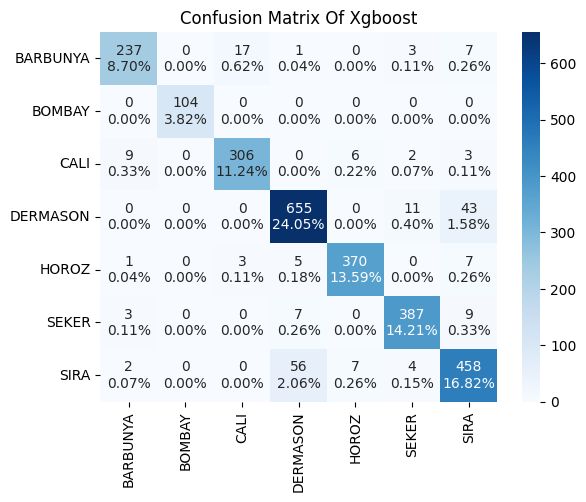

In [244]:
group_counts = [
    "{0:0.0f}".format(value) for value in confusion_matrix_xgb.flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in confusion_matrix_xgb.flatten() / np.sum(confusion_matrix_xgb)
]
labels_matrix = [
    f"{v1}\n{v2}"
    for v1, v2 in zip(group_counts, group_percentages)
]
labels_matrix = np.asarray(labels_matrix).reshape(7, 7)
sns.heatmap(confusion_matrix_xgb, annot=labels_matrix, fmt="", cmap="Blues",
            xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix Of Xgboost")
plt.show()

In [345]:
print(classification_report(y_valid,y_pred_xgb))

ValueError: Mix of label input types (string and number)